In [1]:
# Datset source
# https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

In [2]:
# Problem statement: Predict the appliances energy use based on various features

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
# Read the dataset

import pandas as pd
pd.options.display.max_columns = 1000
aep_df = pd.read_csv('energydata_complete.csv', sep=',')
print(aep_df.shape)
aep_df.head()

(19735, 29)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
# Check for NAN values in the entire dataframe

aep_df.isnull().sum().sum()

0

In [6]:
# Info about the dataframe

aep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
# Some statistics about the dataframe

aep_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


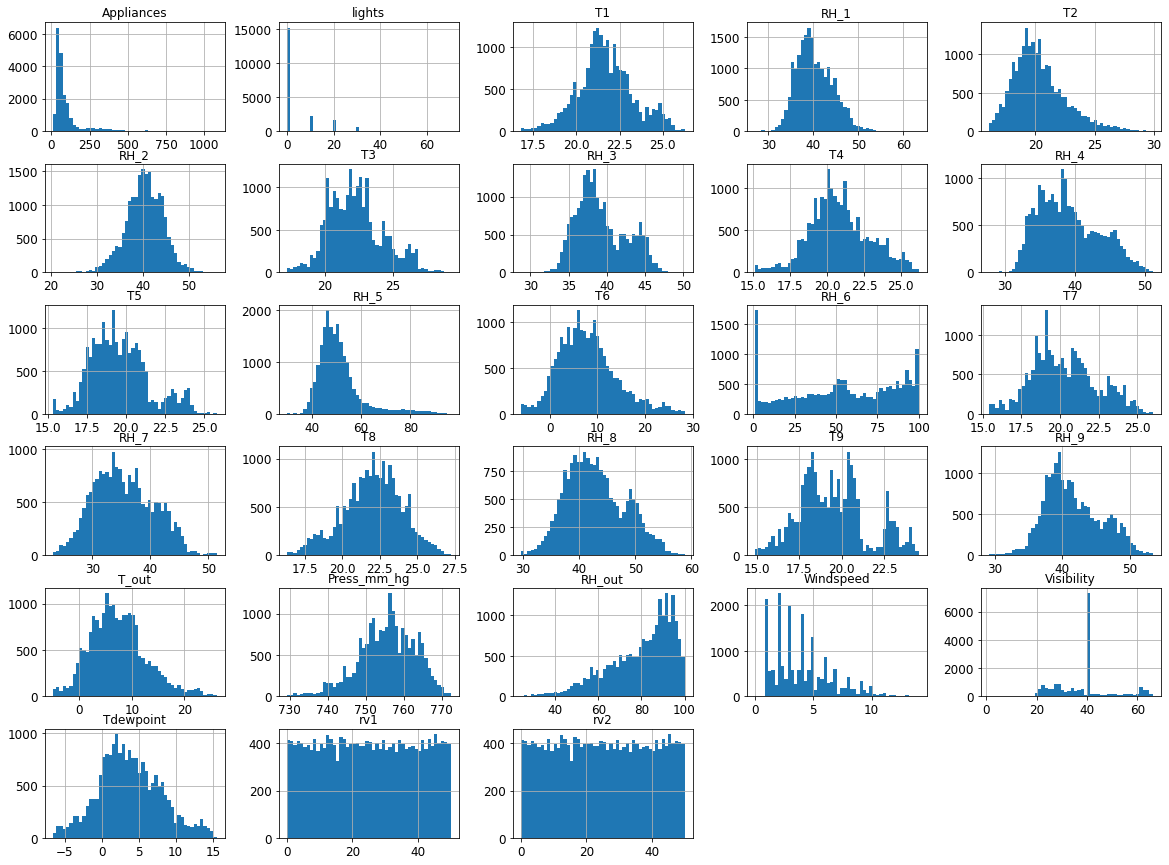

In [8]:
# Plot the histograms for all the features in the dataset

aep_df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# To make this notebook's output identical at every run

np.random.seed(2)

In [10]:
# Plot correlation between scaled sound level in decibels and other features

corr_matrix = aep_df.corr()
corr_matrix["Appliances"].sort_values(ascending=False)

Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64

In [11]:
# Split the dataframe into features and labels

X = aep_df.drop(['date', 'Appliances'], axis=1).values
y = aep_df.loc[:, 'Appliances'].values
print("X shape: ", X.shape, "y shape: ", y.shape)
print("Sample X values: ", X[:5], "\n", "Sample y values: ", y[:5])

X shape:  (19735, 27) y shape:  (19735,)
Sample X values:  [[ 30.          19.89        47.59666667  19.2         44.79
   19.79        44.73        19.          45.56666667  17.16666667
   55.2          7.02666667  84.25666667  17.2         41.62666667
   18.2         48.9         17.03333333  45.53         6.6
  733.5         92.           7.          63.           5.3
   13.27543316  13.27543316]
 [ 30.          19.89        46.69333333  19.2         44.7225
   19.79        44.79        19.          45.9925      17.16666667
   55.2          6.83333333  84.06333333  17.2         41.56
   18.2         48.86333333  17.06666667  45.56         6.48333333
  733.6         92.           6.66666667  59.16666667   5.2
   18.60619498  18.60619498]
 [ 30.          19.89        46.3         19.2         44.62666667
   19.79        44.93333333  18.92666667  45.89        17.16666667
   55.09         6.56        83.15666667  17.2         41.43333333
   18.2         48.73        17.          45.5   

In [12]:
# Split the dataset into train, validation and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=2)
print(" X_train shape: ", X_train.shape,"\n", "y_train shape: ", y_train.shape,"\n",
     "X_val shape: ", X_val.shape,"\n", "y_val shape: ", y_val.shape,"\n",
     "X_test shape: ", X_test.shape,"\n", "y_test shape: ", y_test.shape,"\n")

 X_train shape:  (17810, 27) 
 y_train shape:  (17810,) 
 X_val shape:  (938, 27) 
 y_val shape:  (938,) 
 X_test shape:  (987, 27) 
 y_test shape:  (987,) 



In [13]:
# Model 1
# Sklearn Simple Linear Regression model with default parameters

from sklearn.linear_model import LinearRegression
lr_model_1 = LinearRegression()
lr_model_1.fit(X_train, y_train)
print("Train set score: ", lr_model_1.score(X_train, y_train))
print("Validation set score: ", lr_model_1.score(X_val, y_val))
print("Test set score: ", lr_model_1.score(X_test, y_test))

Train set score:  0.16269008141806152
Validation set score:  0.2234885503227645
Test set score:  0.14762836364067866


In [14]:
# Mean Squared Errors of train, validation and test set predictions

from sklearn.metrics import mean_squared_error
print("Train set mse: ", mean_squared_error(y_train, lr_model_1.predict(X_train)))
print("Validation set mse: ", mean_squared_error(y_val, lr_model_1.predict(X_val)))
print("Test set mse: ", mean_squared_error(y_test, lr_model_1.predict(X_test)))

Train set mse:  8910.858986160203
Validation set mse:  7435.4767179210285
Test set mse:  7682.529682926291


In [15]:
# Here the R^2 values are very low and MSE values are very high, more complex models are required to fit the data

In [16]:
# Model 2
# Sklearn Simple Linear Regression model with normalized data

from sklearn.linear_model import LinearRegression
lr_model_2 = LinearRegression(normalize=True)
lr_model_2.fit(X_train, y_train)
print("Train set score: ", lr_model_2.score(X_train, y_train))
print("Validation set score: ", lr_model_2.score(X_val, y_val))
print("Test set score: ", lr_model_2.score(X_test, y_test))

Train set score:  0.1626900814180614
Validation set score:  0.22348855032276438
Test set score:  0.14762836364067833


In [17]:
# Here normalizing the data didn't made any difference, confirming that more complex models are required to fit the data